# Init NIM

In [1]:
%config Completer.use_jedi = False

import pywinauto

from pywinauto import Desktop

windows = Desktop(backend='uia').windows()
[w.window_text() for w in windows]

from pywinauto.application import Application
app = Application(backend='uia')
app = app.connect(title='NIM Eclipse E4')

win = app.window()

slides=[]
for i in range(8):
    zzz=app.window(found_index=0).child_window(class_name_re='Slider', found_index=i).wrapper_object()
    slides.append(zzz)
    

for i in range(8):
    slides[i].draw_outline()
    

# Tactile

In [ ]:
ser_tac.close()

In [ ]:
import serial
import time
import numpy as np

ser_tac = serial.Serial('COM9', 9600, timeout=0.03)

In [ ]:
def read_tac():    
    ser_tac.flush();
    # time.sleep(0.001)
    ser_tac.readline();
    # time.sleep(0.001);
    l = ser_tac.readline()
    if len(l)>0:
        try:
            line = l.decode('UTF8')
            inarray = np.array(list(filter(len, line.replace('\r\n', '').split(' ')))).astype(int)
            if len(inarray) == 4:
                return inarray-500
            else:
                return None
        except Exception as e:
            print(e)
            print(l)
    else:
        return None
    


while True:
    inarray = read_tac()
    
    if inarray is None:
        continue
    
    
    print(f'{inarray}                  ', end='\r')

    
    # time.sleep(0.1);

## Executing

In [ ]:
min_tac_amplitude = 4.0
max_tac_amplitude = 6.0

max_pressures = np.array([250, 250, 100, 200]);
target_tac = 2;

tac_slide = slides[0];


In [ ]:
tac_slide.set_value(min_tac_amplitude)

ser_tac.flush();
ser_tac.readline();

pressure = (read_tac()/max_pressures)[target_tac]*(max_tac_amplitude - min_tac_amplitude) + min_tac_amplitude 
prev_pressure = pressure;
print(f'{pressure:.3f}      ')

while True:
    inarray = read_tac()
   
    if inarray is None:
        continue
        
    print(f'{inarray} ', end=' - ') 
    
    pressure = (read_tac()/max_pressures)[target_tac]
    print(f'{pressure:.3f} ', end=' - ')
        
    pressure *= (max_tac_amplitude - min_tac_amplitude)
    pressure += min_tac_amplitude
    
    pressure = 0.5*pressure + 0.5*prev_pressure
    
    print(f'{pressure:.3f}', end= ' - ')
    
    if np.abs(pressure - prev_pressure) > 0.2:
        prev_pressure = np.round(pressure, 1)
        tac_slide.set_value(np.clip(prev_pressure, 
                                     min_tac_amplitude,
                                     max_tac_amplitude))

    print('                             ', end='\r')
        
    
    ser_tac.flush();
    
    ser_tac.readline();
    
    # time.sleep(0.05);

In [ ]:
min_distance = 60.0;
max_distance = 240.0;

min_stim_amplitude = 1.7;
max_stim_amplitude = 4.5;
stim_slide = slides[1];


stim_slide.set_value(min_stim_amplitude)


In [ ]:

tac_slide.set_value(min_tac_amplitude)

ser.flush();
ser.readline();

inarray = read_serial()
print(f'{inarray} ', end='')
markers[inarray.reshape(markers.shape)>=0] = inarray[inarray>=0]
distance = np.linalg.norm(markers[1] - markers[0])
prev_distance = distance;
print(f'{distance:.3f}      ', end='\r')


ser_tac.flush();
ser_tac.readline();

pressure = (read_tac()/max_pressures)[target_tac]*(max_tac_amplitude - min_tac_amplitude) + min_tac_amplitude 
prev_pressure = pressure;
print(f'{pressure:.3f}      ')

while True:
    inarray = read_tac()
    if not (inarray is None):
        # print('pressure')
        pressure = (inarray/max_pressures)[target_tac]
        pressure *= (max_tac_amplitude - min_tac_amplitude)
        pressure += min_tac_amplitude
        pressure = 0.5*pressure + 0.5*prev_pressure
    
    inarray = read_serial()
    if not (inarray is None):
        # print('optic')
        markers[inarray.reshape(markers.shape)>=0] = inarray[inarray>=0]
        distance -= distance
        distance += np.linalg.norm(markers[1] - markers[0])
        distance -= max_distance
        distance /= (min_distance - max_distance)

        distance *= (max_stim_amplitude - min_stim_amplitude)
        distance += min_stim_amplitude

        distance = 0.5*distance + 0.5*prev_distance

    if np.abs(pressure - prev_pressure) > 0.2:
        prev_pressure = np.round(pressure, 1)
        tac_slide.set_value(np.clip(prev_pressure, 
                                     min_tac_amplitude,
                                     max_tac_amplitude))
        
    if np.abs(distance - prev_distance) > 0.2:
        prev_distance = np.round(distance,1)
        stim_slide.set_value(np.clip(prev_distance, min_stim_amplitude, max_stim_amplitude))
        
    print(f'{prev_pressure:.03f} {prev_distance:.03f}', end = '\r')
        
    ser_tac.flush(); ser_tac.readline();
    
    ser.flush(); ser.readline();

# Proprioception

In [12]:
ser.close()

In [13]:
import serial
import time
import numpy as np

ser = serial.Serial('COM8', 115200, timeout=0.05)

markers = np.zeros((2,2), dtype='int')

In [14]:
def read_serial():
    l = ser.read_until(b'\r\n')
    if len(l)>0:
        line = l.decode('UTF8')
        if line[-1] == '-':
            line = line[:-1]
        # print(f'{time.time():.3f} - {l}             ', end='\r')
        # print(f'{l}               ', end='\r')
        inarray = np.array(list(filter(len, line.replace('\r\n', '').split(' ')))).astype(int)
        if len(inarray) == 4:
            return inarray
        else:
            return None
    else:
        return None
    

## Monitoring

In [50]:
ser.flush();
ser.readline();

while True:
    inarray = read_serial()
    
    print(f'{inarray} ', end='')
    if inarray is None:
        continue
        
    markers[inarray.reshape(markers.shape)>=0] = inarray[inarray>=0]
    # m2 = markers.copy()
    # m2[-1] = 320 - 2*(320 - m2[-1])
    distance = np.linalg.norm(markers[1] - markers[0])
    print(f'{distance:.3f}      ', end='\r')
    while (len(ser.readline())):
           pass
    
    # time.sleep(0.1);

KeyboardInterrupt: 

## Executing 

In [57]:
min_distance = 150.0;
max_distance = 270.0;

min_stim_amplitude = 1.5;
max_stim_amplitude = 3.7;
stim_slide = slides[1];

stim_slide.set_value(0);


In [ ]:

stim_slide.set_value(min_stim_amplitude)

ser.flush();
ser.readline();

inarray = read_serial()
print(f'{inarray} ', end='')
markers[inarray.reshape(markers.shape)>=0] = inarray[inarray>=0]
distance = np.linalg.norm(markers[1] - markers[0])
prev_distance = 0;
print(f'{distance:.3f}      ', end='\r')

while True:
    inarray = read_serial()
   
    if inarray is None:
        continue
        
    print(f'{inarray} ', end='- ')
    
    markers[inarray.reshape(markers.shape)>=0] = inarray[inarray>=0]
    distance -= distance
    distance += np.linalg.norm(markers[1] - markers[0])
    print(f'{distance:.3f} ', end='')
    
    distance -= max_distance
    distance /= (min_distance - max_distance)
    
    distance *= (max_stim_amplitude - min_stim_amplitude)
    distance += min_stim_amplitude
    
    distance = 0.5*distance + 0.5*prev_distance
    
    print(f'{distance:.3f}', end= '                                  \r')
    
    if np.abs(distance - prev_distance) > 0.2:
        prev_distance = np.round(distance,1)
        stim_slide.set_value(np.clip(prev_distance, min_stim_amplitude, max_stim_amplitude))
        
    while (len(ser.readline())):
           pass
    

# Init ADB

In [96]:
!adb devices

List of devices attached
0123456789ABCDEF	device



b'Physical size: 1536x2048\r\n'


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
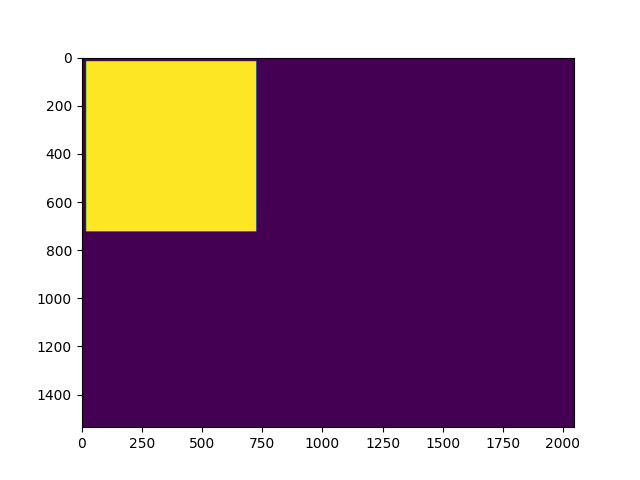

In [97]:
import subprocess
import math
import numpy as np
%matplotlib widget
from matplotlib import pyplot as plt
from matplotlib.path import Path

cmd = r'adb shell wm size'

p1=subprocess.Popen(cmd,shell=True,stdout=subprocess.PIPE)
for line in p1.stdout:
    print(line)
    line = line.decode(encoding="utf-8", errors="ignore")
    line = line.strip()
    if 'Physical size' in line:
        wm_size = (np.array(line.split(' ')[-1].split('\r\n')[0].split('x')).astype(int))
        break
        
wm_center = (wm_size[0]//2, wm_size[1]//2)
wm_size, wm_center


def gen_mask(num_verts, figure_radius, figure_center, first_angle, wm_size):
    

    
    angles = [[np.cos(theta), np.sin(theta)] 
              for theta in np.linspace(first_angle, 
                                       first_angle+2*np.pi, 
                                       num_verts+1)]

    verts = np.array(angles)*figure_radius + figure_center

    polygon=verts
    poly_path=Path(polygon)

    x, y = np.mgrid[:wm_size[0], :wm_size[1]]
    coors=np.hstack((x.reshape(-1, 1), y.reshape(-1,1))) # coors.shape is (4000000,2)

    mask = poly_path.contains_points(coors).reshape(wm_size[0], wm_size[1])
    
    return mask, verts

figure_mask, verts = gen_mask(num_verts=4,
                       figure_radius=500,
                       figure_center=370, 
                       first_angle=np.pi/4,
                       wm_size=wm_size)

plt.figure()
plt.imshow((figure_mask))
plt.show()

# Stimulate vertex

In [ ]:
%matplotlib inline

num_verts=4
figure_center=wm_center 
# first_angle= np.random.rand() * np.pi/2
first_angle = np.pi/4
wm_size=wm_size
figure_radius = 500

figure_mask, figure_verts = gen_mask(num_verts,
                       figure_radius,
                       figure_center,
                       first_angle,
                       wm_size)

plt.figure()
plt.imshow((figure_mask))
plt.gca().invert_yaxis()

In [ ]:
stim_amp = 5
baseline_stim = 6
sense_zone = figure_radius/2

In [ ]:
stim_slider = slides[1]
stim_slider.set_value(0)

try:
    p1.kill()
except Exception as e:
    print(e)

In [ ]:
from datetime import datetime as dt
import os
import time
import subprocess

time_label = dt.now().strftime('%y-%m-%d_%H-%M-%S')

plt.figure()
plt.imshow((figure_mask))
plt.gca().invert_yaxis()
plt.savefig(os.path.join('session', time_label + '_figure_mask.png'), dpi=300)
plt.show()
session_log_filename = os.path.join('session', time_label + '_session.log')

x,y = 0,0
cmd = r'adb shell getevent -t /dev/input/event5'

toggle = 0;
toggle_prev = 0;
p1=subprocess.Popen(cmd,shell=True, stdout=subprocess.PIPE)


try:
    with open(session_log_filename, 'w+') as f:
        print('Started')

        f.write('Mode = vertex stim')
        f.write(f'''
        verts = {num_verts} 
        radius = {figure_radius} 
        center = {figure_center} 
        first_angle = {first_angle} 
        wm_size = {wm_size} 
        stim_amp = {stim_amp} 
        baseline_stim = {baseline_stim}
        sense_zone = {sense_zone}
        ===============================\n''')
        while (True):

            l = p1.stdout.readline()


            line = l.decode(encoding="utf-8", errors="ignore").strip()

            if ' 0036 ' in line:
                e = line.split(" ")
                x = e[-1]
                x = int(x, 16)

            if  ' 0035 ' in line:
                e = line.split(" ")
                y = e[-1]
                y = int(y, 16)
                # print(y)
                if (y > 0) & (x>0):
                    p = (x, y)    
                    x_phys = int(np.round(x/1536*2048))
                    y_phys = int(np.round(y/2048*1536))

                    closest_vertex_rho = np.linalg.norm(figure_verts - np.array([x,y]), axis=1).min()
                    toggle = np.clip(1 - closest_vertex_rho/sense_zone, 0, 1)

                    print(f'{x:04d}, {y:04d} {toggle:04f}', line, end='\r')
                    f.write(str(dt.now()) + ' ' + str(toggle) + ' ' + str(line) + '\n')

                    stim_slider.set_value(toggle*stim_amp+baseline_stim)
                    time.sleep(0.05)
                    while p1.stdout.tell() < -80:
                        p1.stdout.readline()
                        p1.stdout.flush()
except Exception as e:
    p1.kill()
    print(e)
                
"DONE"

# Stimulate field

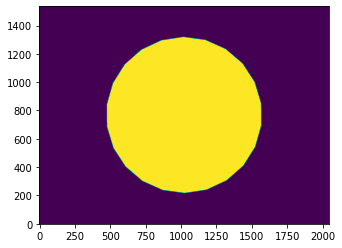

In [231]:
%matplotlib inline
num_verts=np.random.choice([4,5,22])
figure_radius=550
figure_center=wm_center 
first_angle= np.random.rand() * np.pi
# first_angle = np.pi/4
wm_size=wm_size

figure_mask, figure_verts = gen_mask(num_verts,
                       figure_radius,
                       figure_center,
                       first_angle,
                       wm_size)

plt.figure()
plt.imshow((figure_mask))
plt.gca().invert_yaxis()

In [236]:
# каклй стимудтор
current_stim_group = np.random.choice([0,1])
# 0 - a 1 - b 
peak_amp      = [ 4, 2.9][current_stim_group]
baseline_stim = [ 2 , 2 ][current_stim_group]
stim_amp      = peak_amp - baseline_stim
print(['A', 'B'][current_stim_group], baseline_stim, stim_amp)

B 2 0.8999999999999999


In [237]:
#current_stim_group=0;
#peak_amp=8.5
#baseline_stim = 5
#stim_amp=peak_amp-baseline_stim

21-12-06_20-00-34


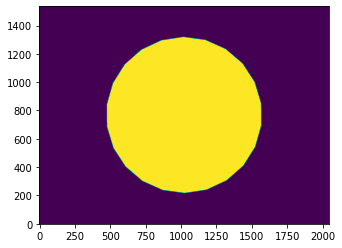

sss


In [238]:
for i in range(2):
    slides[i].set_value(0)
                    

from datetime import datetime as dt
import os
import subprocess

time_label = dt.now().strftime('%y-%m-%d_%H-%M-%S')
print(time_label)

plt.figure()
plt.imshow((figure_mask))
plt.gca().invert_yaxis()
plt.savefig(os.path.join('session', time_label + '_figure_mask.png'), dpi=300)
plt.show()
session_log_filename = os.path.join('session', time_label + '_session.log')

x, y = 0, 0
cmd = r'adb shell getevent -t /dev/input/event5'

toggle = 0;
toggle_prev = 0;
p1=subprocess.Popen(cmd,shell=True,stdout=subprocess.PIPE)

print('sss')

with open(session_log_filename, 'w+') as f:
    f.write('Mode = area stim')
    f.write(f'''
    verts = {num_verts} 
    radius = {figure_radius} 
    center = {figure_center} 
    first_angle = {first_angle} 
    wm_size = {wm_size} 
    stim_amp = {stim_amp} 
    baseline_stim = {baseline_stim}
    current_stim_group = {current_stim_group}
    sense_zone = {0}
    ===============================\n''')
    for l in p1.stdout:
        line = l.decode(encoding="utf-8", errors="ignore").strip()

        if ' 0036 ' in line:
            e = line.split(" ")
            x = e[-1]
            x = int(x, 16)

        if  ' 0035 ' in line:
            e = line.split(" ")
            y = e[-1]
            y = int(y, 16)
            # print(y)
            if (y > 0) & (x>0):
                p = (x, y)    
                x_phys = int(np.round(x/1536*2048))
                y_phys = int(np.round(y/2048*1536))
                
                toggle = figure_mask[y_phys, x_phys]
                
                print(f'{x:04d}, {y:04d} {toggle}', line, end='\r')
                f.write(str(dt.now()) + ' ' + str(toggle) + ' ' + str(line) + '\n')
    
                if toggle!=toggle_prev:
                    # print(str(toggle)+'   '+str(x)+'     '+str(y), end='\r');
                    toggle_prev = toggle
                    slides[current_stim_group].set_value(toggle*stim_amp+baseline_stim)
                    while p1.stdout.tell() < -200:
                        p1.stdout.readline()
                

In [ ]:
import ipywidgets as w

def func(x):
    slides[1].set_value(x)
    return x

w.interact(func,
           x=w.FloatSlider(0, min=0, max=7.0, step=0.1))

In [ ]:
for i in list(range(30)) + list(range(30,-1,-1)):
    print(i/10)
    #slides[1].set_value(i/10)

In [ ]:
slides[1].set_value(3)

In [ ]:
i=5

In [ ]:
i=i+1
slides[1].set_value(i/10)

In [ ]:
985     8345 - 0


In [ ]:
2048 1
2048 1484
00 1508

In [ ]:
e

In [ ]:

    
def square_audio(center=center):
    cmd = r'adb shell getevent'
    w = 0
    h = 0
    play_obj=None
    lower_width=center[0]-200
    higher_width=center[0]+200

    lower_heigth=center[1]-200
    higher_heigth=center[1]+200
    
    try:
        p1=subprocess.Popen(cmd,shell=True,stdout=subprocess.PIPE)
        for line in p1.stdout:
            line = line.decode(encoding="utf-8", errors="ignore")
            line = line.strip()
            print(line);
            if ' 0035 ' in line:
                e = line.split(" ")
                w = e[3]
                w = int(w, 16)
                
            if  ' 0036 ' in line:
                e = line.split(" ")
                h = e[3]
                h = int(h, 16)
                if h > 0:
                    p = (w, h)                   
                    print(p) 
                    if (w> lower_width and w< higher_width) and  (h> lower_heigth and h< higher_heigth):
                        
                        print('stim')
                    else:
                        print('Nostim')

                        
        p1.wait()
        
    except Exception as e:
        print(e)
        




In [ ]:
a=square_audio()

In [ ]:
def square_electro(center=center):
    cmd = r'adb shell getevent'
    w = 0
    h = 0
    play_obj=None
    toggle=0
    toggle_prev=0
    lower_width=center[0]-200
    higher_width=center[0]+200

    lower_heigth=center[1]-200
    higher_heigth=center[1]+200
    try:
        p1=subprocess.Popen(cmd,shell=True,stdout=subprocess.PIPE)
        for line in p1.stdout:
            line = line.decode(encoding="utf-8", errors="ignore")
            line = line.strip()
            if ' 0035 ' in line:
                e = line.split(" ")
                w = e[3]
                w = int(w, 16)
                
            if  ' 0036 ' in line:
                e = line.split(" ")
                h = e[3]
                h = int(h, 16)
                if h > 0:
                    p = (w, h)                   
                    print(p) 
                    if (w> lower_width and w< higher_width) and  (h> lower_heigth and h< higher_heigth): 
                        toggle=1
                        #apply_stim(1,5,0)
                        #apply_stim(0,25,10)
                        FG=1
                    else:
                        toggle=0
                        
                    
                    if toggle>toggle_prev:
                        apply_stim(1,6000,0)
                        toggle_prev=toggle
                        print('switch on')
                        value = write_read(1)
                        
                    elif toggle<toggle_prev:
                        arduino.send_break()
                        toggle_prev=toggle
                        print('switch off')
                        value = write_read(0)

                        
        p1.wait()
        
    except Exception as e:
        print(e)
        




# Круг

In [ ]:
radius=200
center = (1080/2, 1920/2)

In [ ]:

    
def circle_audio(center=center,radius=radius):
    cmd = r'adb shell getevent'
    w = 0
    h = 0
    play_obj=None
    
    try:
        p1=subprocess.Popen(cmd,shell=True,stdout=subprocess.PIPE)
        for line in p1.stdout:
            line = line.decode(encoding="utf-8", errors="ignore")
            line = line.strip()
            if ' 0035 ' in line:
                e = line.split(" ")
                w = e[3]
                w = int(w, 16)
                
            if  ' 0036 ' in line:
                e = line.split(" ")
                h = e[3]
                h = int(h, 16)
                if h > 0:
                    p = (w, h)                   
                    print(p) 
                    if np.sum((np.array(p) - np.array(center))**2) < radius**2:
                        
                        if play_obj is None:
                            play_obj =sa.play_buffer(audio, 1, 2, fs)
                        elif  not play_obj.is_playing():
                            play_obj =sa.play_buffer(audio, 1, 2, fs)
                            
                    else:
                        sa.stop_all()

                        
        p1.wait()
        
    except Exception as e:
        print(e)
        




In [ ]:
def circle_electro(center=center,radius=radius):
    cmd = r'adb shell getevent'
    w = 0
    h = 0
    play_obj=None
    
    
    try:
        p1=subprocess.Popen(cmd,shell=True,stdout=subprocess.PIPE)
        for line in p1.stdout:
            line = line.decode(encoding="utf-8", errors="ignore")
            line = line.strip()
            if ' 0035 ' in line:
                e = line.split(" ")
                w = e[3]
                w = int(w, 16)
                
            if  ' 0036 ' in line:
                e = line.split(" ")
                h = e[3]
                h = int(h, 16)
                if h > 0:
                    p = (w, h)                   
                    print(p) 
                    if np.sum((np.array(p) - np.array(center))**2) < radius**2:
                        #apply_stim(1,25,1)
                        A=1
                    else:
                        arduino.send_break()
                        A=1

                        
        p1.wait()
        
    except Exception as e:
        print(e)
        




In [ ]:
def circle_electro(center=center,radius=radius):
    cmd = r'adb shell getevent'
    w = 0
    h = 0
    play_obj=None
    toggle=0
    toggle_prev=0
    
    try:
        p1=subprocess.Popen(cmd,shell=True,stdout=subprocess.PIPE)
        for line in p1.stdout:
            line = line.decode(encoding="utf-8", errors="ignore")
            line = line.strip()
            if ' 0035 ' in line:
                e = line.split(" ")
                w = e[3]
                w = int(w, 16)
                
            if  ' 0036 ' in line:
                e = line.split(" ")
                h = e[3]
                h = int(h, 16)
                if h > 0:
                    p = (w, h)                   
                    print(p) 
                    if np.sum((np.array(p) - np.array(center))**2) < radius**2:
                        toggle=1
                    else:
                        toggle=0
                        
                    if toggle>toggle_prev:
                        toggle_prev=toggle
                        print('switch on')
                        value = write_read(1)
                        
                    elif toggle<toggle_prev:
                        arduino.send_break()
                        toggle_prev=toggle
                        print('switch off')
                        value = write_read(0)

                        
        p1.wait()
        
    except Exception as e:
        print(e)
        




In [ ]:
i=0
seqs=[[1,654,1309],
[0,623,1172],
[0,643,1199],
[0,573,1103],
[1,681,1104],
[1,603,1405],
[1,592,1141],
[0,643,1258],
[0,651,1101],
[0,660,987],
[1,672,1070],
[0,646,1289],
[0,595,988],
[0,669,1419],
[0,572,1488],
[1,573,1232],
[1,659,1095],
[0,623,1388],
[1,638,1008],
[1,675,1261],
[0,643,1167],
[0,587,1142],
[1,690,1104],
[0,681,1268],
[1,649,1353],
[1,616,1001],
[0,599,1044],
[1,646,1431],
[0,634,1424],
[0,597,1459],
[1,661,987],
[0,563,1226],
[1,604,1195],
[0,675,1061],
[1,686,1339],
[1,560,1356],
[1,664,1285],
[0,663,1473],
[1,620,1423],
[1,622,1540]]

In [ ]:

i=13
print(i)
trial=seqs[i]
trial_code=trial[0]
print(trial)
center=trial[1:]
    

In [ ]:
center

In [ ]:
circle_electro(center)

In [ ]:
if trial_code==0:
    print(trial_code)
    circle_audio(center)
else:
    square_audio(center)

In [ ]:
if trial_code==0:
    print(trial_code)
    circle_electro(center)
else:
    square_electro(center)

In [ ]:
1 +
2 +
3 +
4 +
5 +
6 +
7 +
8 +


9 тест
10 +
11 +
12 +